Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

Load the dataset

In [2]:
df = pd.read_csv(r"D:\Ashraf\Internship\CODSOFT\Dataset\SMS Spam\spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
# Drop unnecessary columns

df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Preprocessing

In [5]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df = df.rename(columns={"v1": "label", "v2": "message"}).dropna()

In [7]:
# Label encoding
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [8]:
# Text cleaning function
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

df['message'] = df['message'].apply(clean_text)

# Exploratory Data Analysis

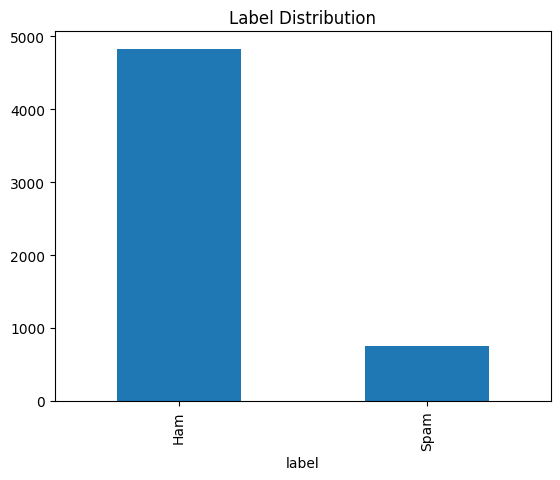

In [9]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar')
plt.title("Label Distribution")
plt.xticks(ticks=[0, 1], labels=["Ham", "Spam"])
plt.show()

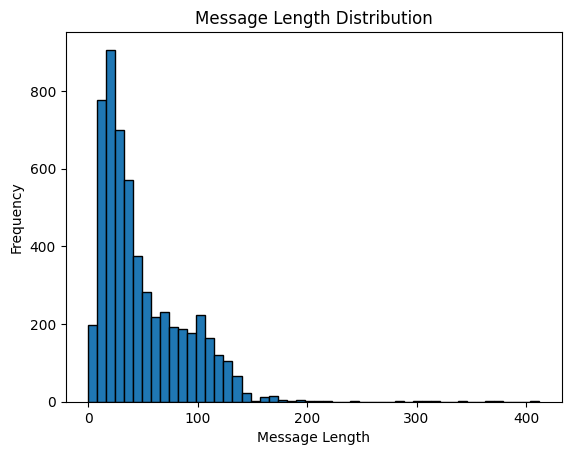

In [10]:
df['message_length'] = df['message'].apply(len)

plt.hist(df['message_length'], bins=50, edgecolor='k')
plt.title("Message Length Distribution")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

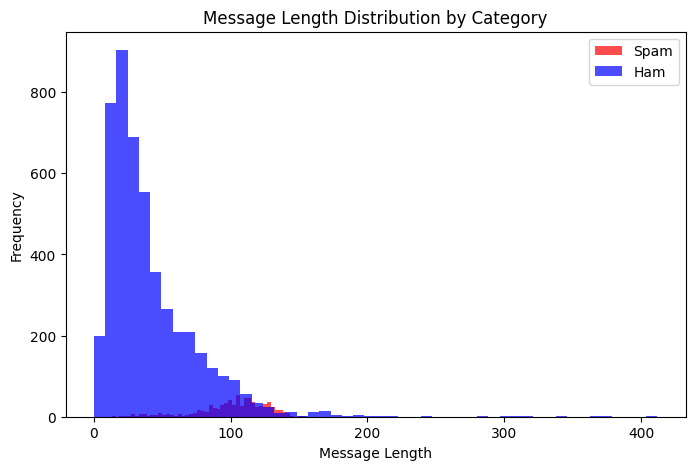

In [11]:
spam_messages = df[df['label'] == 1]
ham_messages = df[df['label'] == 0]

plt.figure(figsize=(8, 5))
plt.hist(spam_messages['message_length'], bins=50, alpha=0.7, label='Spam', color='red')
plt.hist(ham_messages['message_length'], bins=50, alpha=0.7, label='Ham', color='blue')
plt.title('Message Length Distribution by Category')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

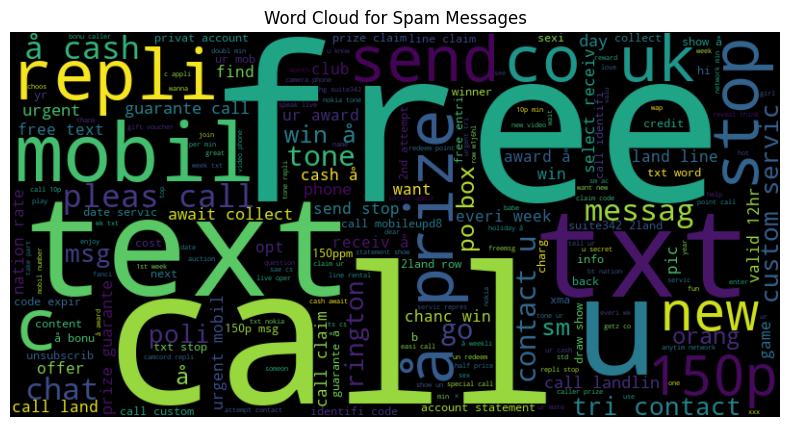

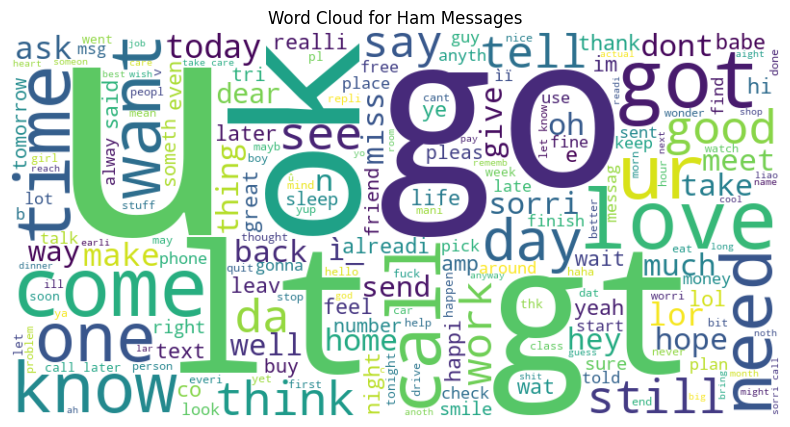

In [12]:
from wordcloud import WordCloud

spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(spam_messages['message']))
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_messages['message']))
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

In [13]:
from collections import Counter
import itertools

spam_words = list(itertools.chain(*[msg.split() for msg in spam_messages['message']]))
ham_words = list(itertools.chain(*[msg.split() for msg in ham_messages['message']]))

spam_common = Counter(spam_words).most_common(10)
ham_common = Counter(ham_words).most_common(10)

print("Most common words in Spam messages:", spam_common)
print("Most common words in Ham messages:", ham_common)

Most common words in Spam messages: [('call', 374), ('å', 299), ('free', 224), ('2', 206), ('txt', 176), ('u', 174), ('text', 145), ('ur', 144), ('mobil', 139), ('4', 137)]
Most common words in Ham messages: [('u', 1018), ('go', 418), ('get', 362), ('2', 322), ('gt', 318), ('lt', 316), ('call', 298), ('come', 296), ('ok', 287), ('love', 250)]


                message_length    label
message_length         1.00000  0.52957
label                  0.52957  1.00000


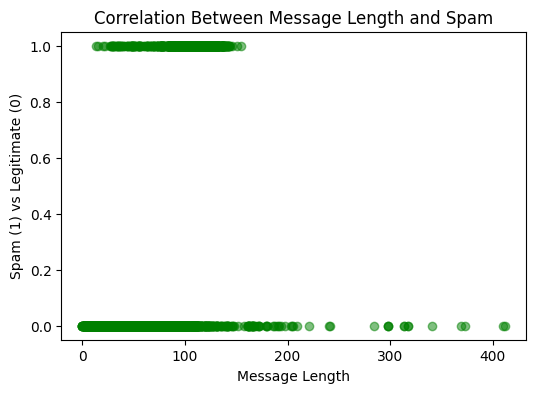

In [14]:
# Correlation between message length and label

correlation = df[['message_length', 'label']].corr()
print(correlation)

plt.figure(figsize=(6, 4))
plt.scatter(df['message_length'], df['label'], alpha=0.5, color='green')
plt.title('Correlation Between Message Length and Spam')
plt.xlabel('Message Length')
plt.ylabel('Spam (1) vs Legitimate (0)')
plt.show()

# Feature Extraction

In [15]:
tfidf = TfidfVectorizer(max_features=5000)

X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model Training and Testing

Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc, roc_auc_score

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

nb_predictions = nb_model.predict(X_test_tfidf)

Support Vector Machine

In [17]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

svm_predictions = svm_model.predict(X_test_tfidf)

# Evaluation

Naive Bayes

In [18]:
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

print("Naive Bayes Metrics:")
print(f"Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1 Score: {nb_f1:.2f}")

Naive Bayes Metrics:
Accuracy: 0.97
Precision: 0.99
Recall: 0.75
F1 Score: 0.85


In [19]:
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
print("Naive Bayes Confusion Matrix:")
print(nb_conf_matrix)

Naive Bayes Confusion Matrix:
[[965   1]
 [ 37 112]]


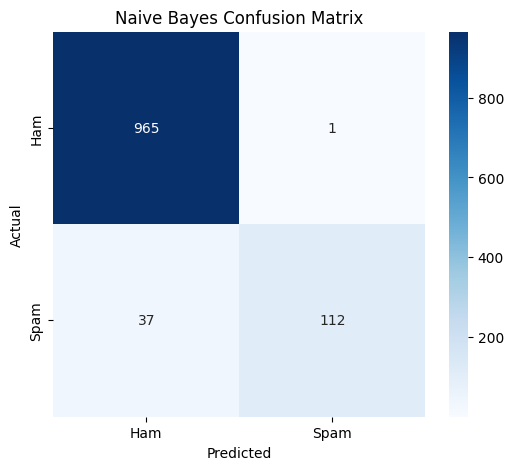

In [20]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.75      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



SVM

In [22]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
svm_decision = svm_model.decision_function(X_test_tfidf)

print("SVM Metrics:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1 Score: {svm_f1:.2f}")

SVM Metrics:
Accuracy: 0.98
Precision: 0.99
Recall: 0.89
F1 Score: 0.93


In [23]:
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
print("SVM Confusion Matrix:")
print(svm_conf_matrix)

SVM Confusion Matrix:
[[964   2]
 [ 17 132]]


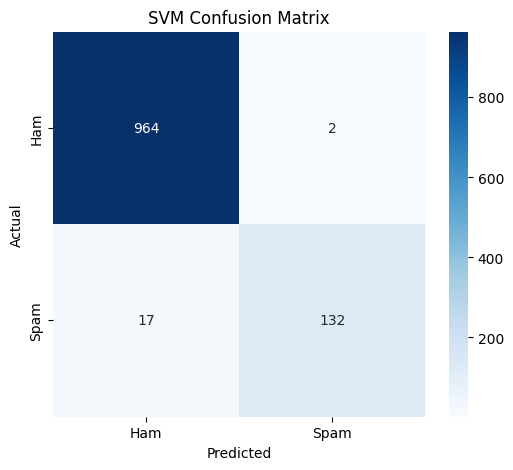

In [24]:
plt.figure(figsize=(6, 5))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



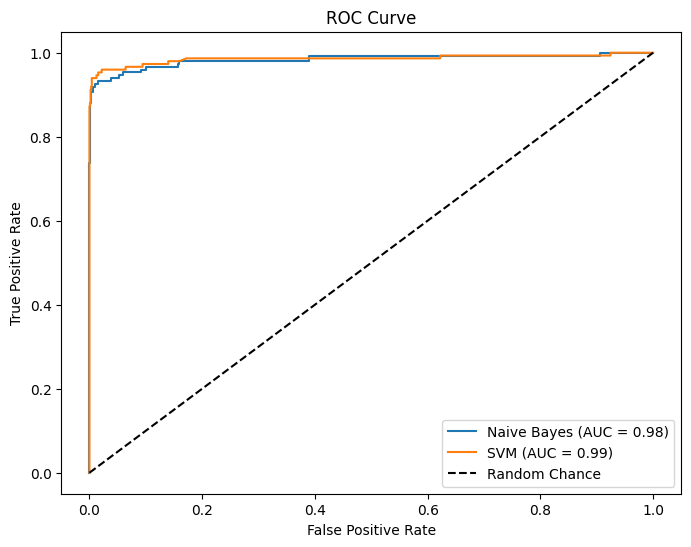

In [26]:
nb_roc_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test_tfidf)[:, 1])
svm_roc_auc = roc_auc_score(y_test, svm_decision)

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_model.predict_proba(X_test_tfidf)[:, 1])
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_decision)

plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_roc_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

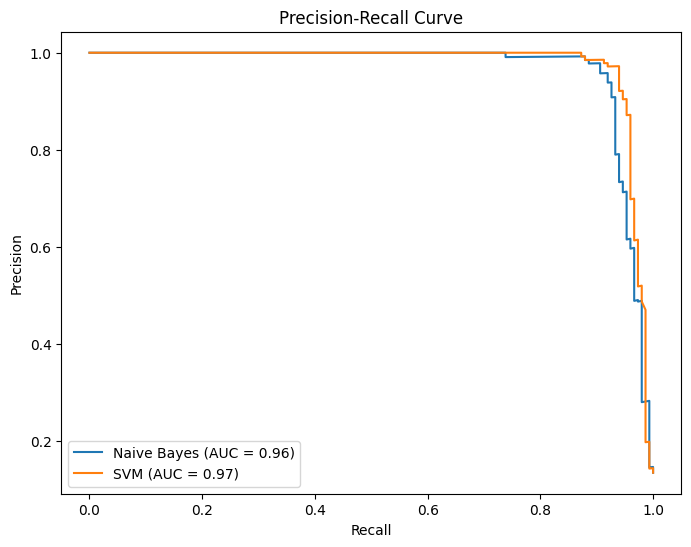

In [27]:
nb_precision, nb_recall, _ = precision_recall_curve(y_test, nb_model.predict_proba(X_test_tfidf)[:, 1])
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_decision)

nb_pr_auc = auc(nb_recall, nb_precision)
svm_pr_auc = auc(svm_recall, svm_precision)

plt.figure(figsize=(8, 6))
plt.plot(nb_recall, nb_precision, label=f'Naive Bayes (AUC = {nb_pr_auc:.2f})')
plt.plot(svm_recall, svm_precision, label=f'SVM (AUC = {svm_pr_auc:.2f})')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()